In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("datasets/COVID-19 World Vaccination Progress/country_vaccinations.csv")
usa_values=data.loc[data['iso_code']=='USA']


people_fully_vaccinated=usa_values[['iso_code','date','people_fully_vaccinated']]
people_fully_vaccinated=people_fully_vaccinated.dropna()


# People fully vaccinated
The mean, standard deviation, min, max, and the quartiles are found

In [3]:
people_fully_vaccinated.describe().apply(lambda x: '%.5f' % x, axis=1)

count          91.00000
mean     31929907.90110
std      24208365.96282
min       1342086.00000
25%       9679222.00000
50%      27795980.00000
75%      49418470.50000
max      84263408.00000
dtype: object

Text(0, 0.5, 'Population per 500,000')

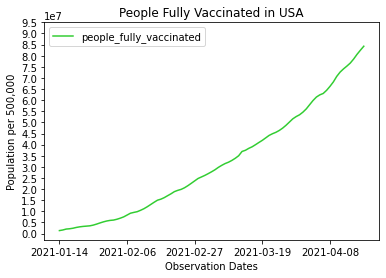

In [4]:
plot=people_fully_vaccinated.plot(x='date',y='people_fully_vaccinated',kind='line',yticks=list(range(0,100000000,5000000)), color='#32CD32',title='People Fully Vaccinated in USA')
plot.set_xlabel("Observation Dates")
plot.set_ylabel("Population per 500,000")

In [5]:
all_countries = data[['iso_code','date','people_fully_vaccinated']]


In [6]:
us_daily_vaccines=pd.read_csv("datasets/us-daily-vaccines.csv")
states=sorted(set(us_daily_vaccines['Entity']))

count=0
filtered_states = []
states_sum = []
sum_data=[]

states_to_exclude=["American Samoa","Bureau of Prisons","Dept of Defense","District of Columbia","Federated States of Micronesia","Guam","Indian Health Svc","Long Term Care","Marshall Islands","Northern Mariana Islands","Puerto Rico","Republic of Palau","Veterans Health","United States","Virgin Islands"]
for s in states:
    if s in states_to_exclude:
        continue
    filtered_states.append(s)
    value = us_daily_vaccines[us_daily_vaccines["Entity"]==s]
    value = value["daily_vaccinations"].sum()
    states_sum.append(value)
    sum_data.append([s,value])
    count+=1
total_number_of_vaccinations = pd.DataFrame(data=sum_data,columns=["State", "Total Vaccinations"])
quartile_1 = np.percentile(total_number_of_vaccinations["Total Vaccinations"], 25)
quartile_3 = np.percentile(total_number_of_vaccinations["Total Vaccinations"], 75)
total_number_of_vaccinations.describe().apply(lambda x: '%.5f' % x, axis=1)

count          50.00000
mean      4089885.82000
std       4695572.64397
min        319377.00000
25%       1110997.00000
50%       2653070.00000
75%       5102783.50000
max      26132162.00000
dtype: object

In [7]:
from IPython.core.display import display, HTML
display(HTML(filename="map-viz.html"))


In [8]:
covid_19_data_world=pd.read_csv("datasets/Novel Corona Virus 2019 Dataset/covid_19_data.csv")
covid_19_data_usa = covid_19_data_world[covid_19_data_world['Country/Region']=="US"]

covid_19_data_usa_confirmed = covid_19_data_usa[['ObservationDate','Province/State','Country/Region','Confirmed']]
display(covid_19_data_usa_confirmed)


,ObservationDate,Province/State,Country/Region,Confirmed
31,01/22/2020,Washington,US,1.0
69,01/23/2020,Washington,US,1.0
117,01/24/2020,Washington,US,1.0
118,01/24/2020,Chicago,US,1.0
158,01/25/2020,Washington,US,1.0
...,...,...,...,...
235983,02/27/2021,Virginia,US,574314.0
235993,02/27/2021,Washington,US,339773.0
235996,02/27/2021,West Virginia,US,131580.0
235998,02/27/2021,Wisconsin,US,616886.0


In [9]:
# to get the std and percentiles 
covid_19_data_usa_confirmed.describe().apply(lambda x: '%.5f' % x, axis=1)

count      21462.00000
mean      149160.90355
std       309144.87948
min            0.00000
25%         2710.25000
50%        35865.50000
75%       156865.25000
max      3563578.00000
dtype: object

Text(0, 0.5, 'COVID19 Confirmed Cases')

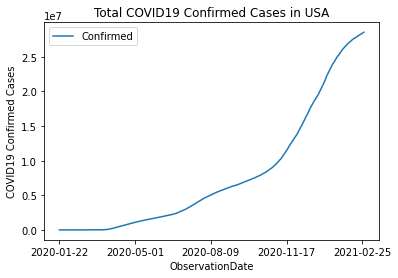

In [10]:
from datetime import datetime

dates=list(set(covid_19_data_usa_confirmed['ObservationDate']))
dates.sort(key=lambda date: datetime.strptime(date, "%m/%d/%Y"))

confirmed_cases_usa = pd.DataFrame({'ObservationDate':[],'Confirmed':[]})
for d in dates:
    temp=covid_19_data_usa_confirmed[covid_19_data_usa_confirmed["ObservationDate"]==d]
    d=datetime.strptime(d, "%m/%d/%Y")
    d=d.strftime('%Y-%m-%d')
    confirmed_cases_usa.loc[len(confirmed_cases_usa.index)] = [d, temp['Confirmed'].sum()] 

plot = confirmed_cases_usa.plot(x='ObservationDate',y='Confirmed',kind='line',xticks=list(range(0,500,100)),title='Total COVID19 Confirmed Cases in USA')
plot.set_ylabel("COVID19 Confirmed Cases")

Text(0.5, 1.0, 'Kernel Density Estimate for Confirmed COVID-19 Cases\n')

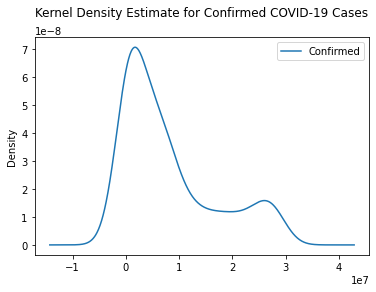

In [11]:
plot = confirmed_cases_usa.plot.kde()
plot.set_xlabel("")
plot.set_ylabel("Density")
plot.set_title("Kernel Density Estimate for Confirmed COVID-19 Cases\n")

Text(0, 0.5, 'Population per 100,000')

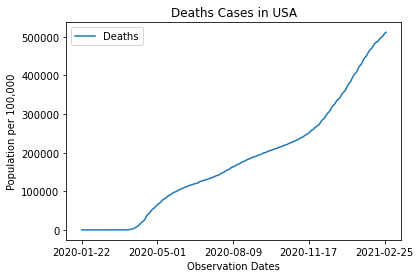

In [12]:
covid_19_data_usa_deaths = covid_19_data_usa[['ObservationDate','Province/State','Country/Region','Deaths']]

deaths_cases_usa = pd.DataFrame({'ObservationDate':[],'Deaths':[]})
for d in dates:
    temp=covid_19_data_usa_deaths[covid_19_data_usa_deaths["ObservationDate"]==d]
    d=datetime.strptime(d, "%m/%d/%Y")
    d=d.strftime('%Y-%m-%d')
    deaths_cases_usa.loc[len(deaths_cases_usa.index)] = [d, temp['Deaths'].sum()] 

plot = deaths_cases_usa.plot(x='ObservationDate',y='Deaths',kind='line',xticks=list(range(0,500,100)),title='Deaths Cases in USA')
plot.set_xlabel("Observation Dates")
plot.set_ylabel("Population per 100,000")

In [13]:
deaths_cases_usa.describe()

,Deaths
count,403.000000
mean,179213.498759
std,142776.472362
min,0.000000
25%,66075.000000
50%,164041.000000
75%,253826.000000
max,511994.000000


Text(0.5, 1.0, 'Kernel Density Estimate for Deaths from COVID-19\n')

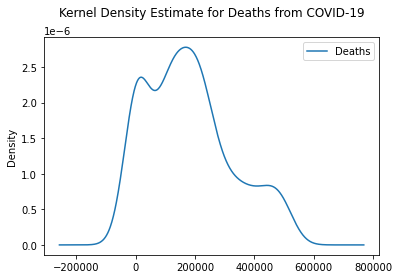

In [14]:
plot = deaths_cases_usa.plot.kde()
plot.set_ylabel("Density")
plot.set_title("Kernel Density Estimate for Deaths from COVID-19\n")

Text(0, 0.5, 'Observation Dates')

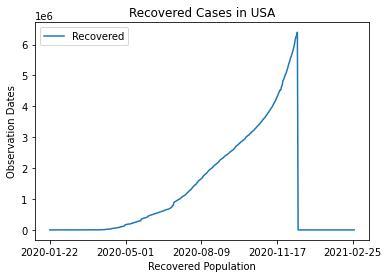

In [15]:
covid_19_data_usa_recovered = covid_19_data_usa[['ObservationDate','Province/State','Country/Region','Recovered']]

recovered_cases_usa = pd.DataFrame({'ObservationDate':[],'Recovered':[]})
for d in dates:
    temp=covid_19_data_usa_recovered[covid_19_data_usa_recovered["ObservationDate"]==d]
    d=datetime.strptime(d, "%m/%d/%Y")
    d=d.strftime('%Y-%m-%d')
    recovered_cases_usa.loc[len(recovered_cases_usa.index)] = [d, temp['Recovered'].sum()] 

plot = recovered_cases_usa.plot(x='ObservationDate',y='Recovered',kind='line',xticks=list(range(0,500,100)),title='Recovered Cases in USA')
plot.set_xlabel("Recovered Population")
plot.set_ylabel("Observation Dates")


In [16]:
recovered_cases_usa.describe().apply(lambda x: '%.5f' % x, axis=1)

count        403.00000
mean     1249059.44417
std      1630170.41782
min            0.00000
25%            3.00000
50%       391508.00000
75%      2292820.50000
max      6399531.00000
dtype: object

In [17]:
# Median
# 5.1, 0.16, 0.3
from statistics import median, mode
print(median(confirmed_cases_usa['Confirmed']))
print(median(deaths_cases_usa['Deaths']))
print(median(recovered_cases_usa['Recovered']))

5107195.0
164041.0
391508.0


In [18]:
# Mode
print(mode(confirmed_cases_usa['Confirmed']))
print(mode(deaths_cases_usa['Deaths']))
print(mode(recovered_cases_usa['Recovered']))

15.0
0.0
0.0


Text(0.5, 1.0, 'Kernel Density Estimate for People Recovering from COVID-19\n')

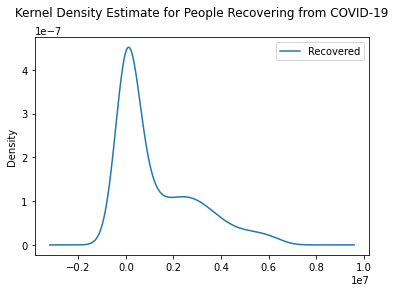

In [19]:
plot = recovered_cases_usa.plot.kde()
plot.set_ylabel("Density")
plot.set_title("Kernel Density Estimate for People Recovering from COVID-19\n")

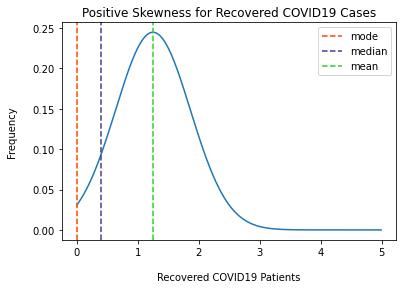

In [20]:
# Recovered COVID19 - Positive Skewness
# mode, median, mean
mean = 1.249059; std = 1.630170; median =  0.391508; mode = 0.0; variance = np.square(std)
x = np.arange(0,5,.01)
f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.axvline(x=mode, linestyle='--', linewidth=1.5, label='mode', c='orangered')
plt.axvline(x=median, linestyle='--', linewidth=1.5, label='median', c='darkslateblue')
plt.axvline(x=mean, linestyle='--', linewidth=1.5, label='mean', c='limegreen')
plt.title('Positive Skewness for Recovered COVID19 Cases')
plt.xlabel('Recovered COVID19 Patients', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.legend()
plt.show()

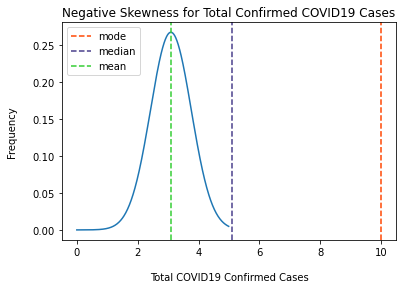

In [21]:
# Total Confirmed COVID19 Cases
# Negative Skew
# mean, median, mode
mean = 3.091449; std = 1.491609; median = 5.107195; mode = 10; variance = np.square(std)
x = np.arange(0,5, .01)
f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.axvline(x=mode, linestyle='--', linewidth=1.5, label='mode', c='orangered')
plt.axvline(x=median, linestyle='--', linewidth=1.5, label='median', c='darkslateblue')
plt.axvline(x=mean, linestyle='--', linewidth=1.5, label='mean', c='limegreen')
plt.title('Negative Skewness for Total Confirmed COVID19 Cases')
plt.xlabel('Total COVID19 Confirmed Cases', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.legend()
plt.show()

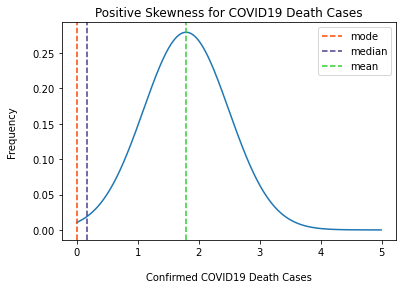

In [22]:
# Death Cases Skewness Graph
# Positive Skew
mean = 1.79213; std = 1.42776; median = 0.164041; mode = 0.0; variance = np.square(std)
x = np.arange(0,5,.01)
f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.axvline(x=mode, linestyle='--', linewidth=1.5, label='mode', c='orangered')
plt.axvline(x=median, linestyle='--', linewidth=1.5, label='median', c='darkslateblue')
plt.axvline(x=mean, linestyle='--', linewidth=1.5, label='mean', c='limegreen')
plt.title('Positive Skewness for COVID19 Death Cases')
plt.xlabel('Confirmed COVID19 Death Cases', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.legend()
plt.show()

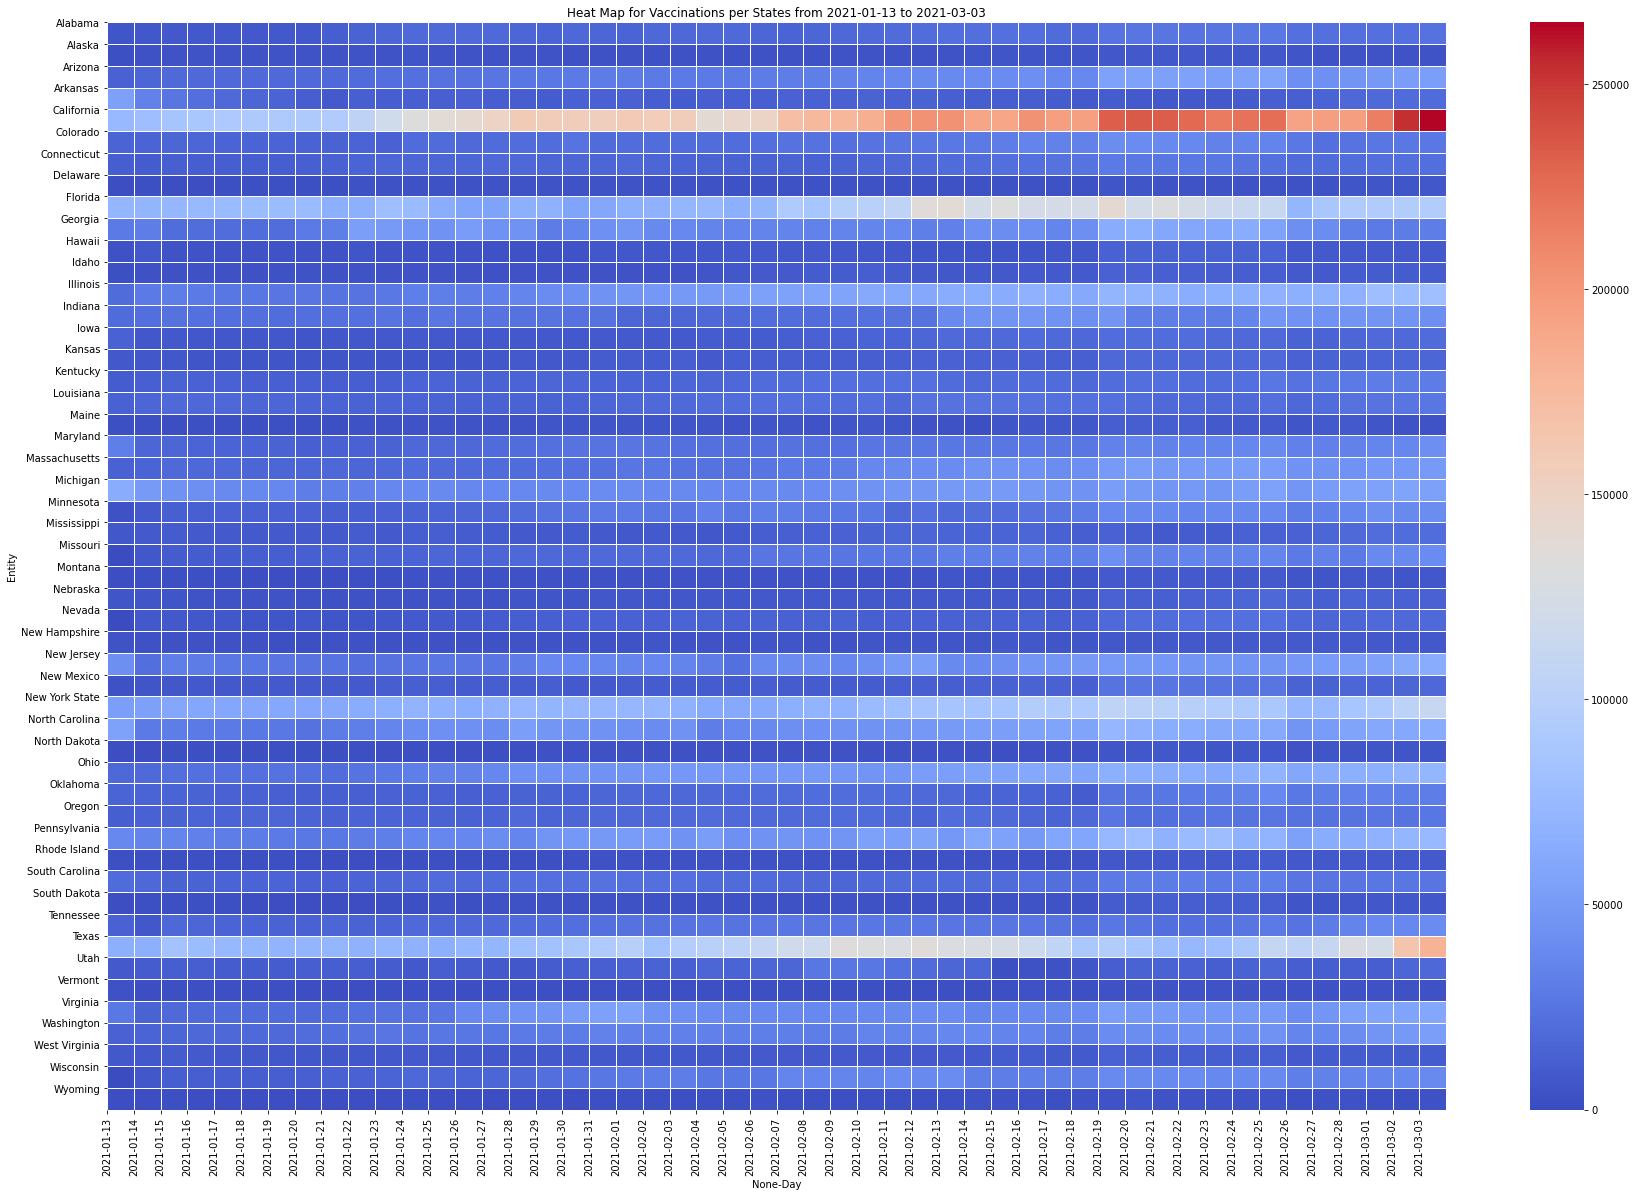

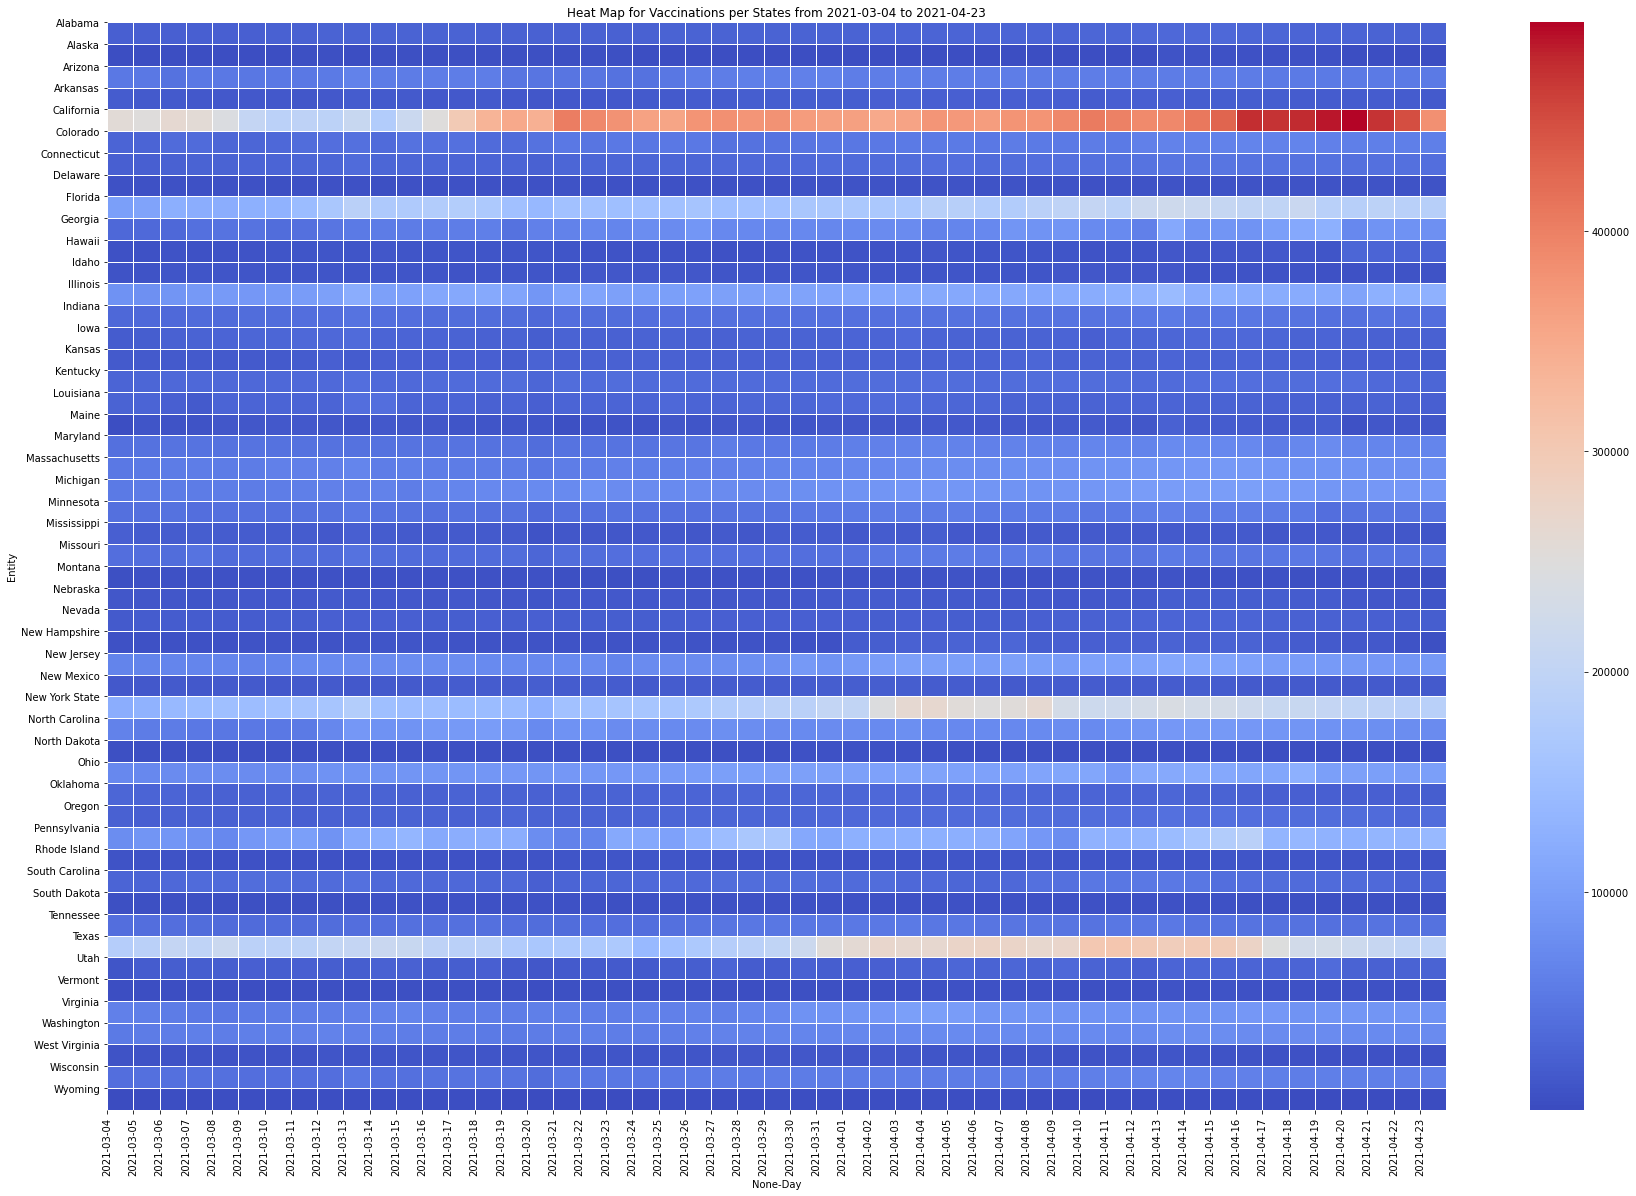

In [23]:
us_daily_vaccines=pd.read_csv("datasets/us-daily-vaccines.csv")


states_to_exclude=["American Samoa","Bureau of Prisons","Dept of Defense","District of Columbia","Federated States of Micronesia","Guam","Indian Health Svc","Long Term Care","Marshall Islands","Northern Mariana Islands","Puerto Rico","Republic of Palau","Veterans Health","United States","Virgin Islands"]


count =0
for s in states_to_exclude:
    us_daily_vaccines=us_daily_vaccines[us_daily_vaccines['Entity']!=states_to_exclude[count]]
    count+=1
states=sorted(set(us_daily_vaccines['Entity']))

data_cleaned=us_daily_vaccines[["Entity","Day","daily_vaccinations"]].pivot_table(index="Entity",columns="Day")


import seaborn as sns

data= data_cleaned.iloc[:, : 50]
ax = sns.heatmap( data , linewidth =0.5 , cmap = 'coolwarm',cbar_kws={'ticks': list(range(0,300000,50000))})
fig = plt.gcf()  
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 5) 
dates=[]
for col in data.columns:
    dates.append(col[1])
plt.yticks(list(range(0,50)),states)
plt.xticks(list(range(0,50)),dates)
plt.title( "Heat Map for Vaccinations per States from "+dates[0]+" to "+dates[len(dates)-1])
plt.show()

data= data_cleaned.iloc[:, 50:]
ax = sns.heatmap( data , linewidth =0.5 , cmap = 'coolwarm')
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 5) 
dates=[]
for col in data.columns:
    dates.append(col[1])
plt.yticks(list(range(0,50)),states)
plt.xticks(list(range(0,51)),dates)
plt.title( "Heat Map for Vaccinations per States from "+dates[0]+" to "+dates[len(dates)-1])


plt.show()

# Visualization

We use the `cartopy` library to make the map

In [24]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

Using a [reference map](https://stackoverflow.com/questions/53290602/how-to-use-cartopy-to-create-colored-us-states)

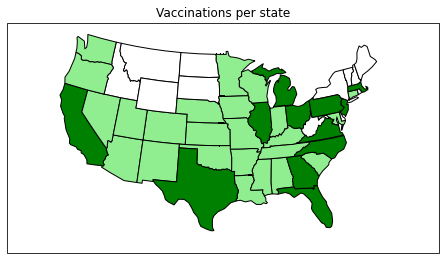

In [25]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

ax.set_title('Vaccinations per state')

for astate in shpreader.Reader(states_shp).records():
    edgecolor = 'black'

    try:
        state_dens = total_number_of_vaccinations[total_number_of_vaccinations["State"] == astate.attributes['name']]["Total Vaccinations"].item()
    except:
        state_dens = 0

    if state_dens < quartile_1:
        facecolor = "white"
    elif state_dens > quartile_3:
        facecolor = "green"
    else:
        facecolor = "lightgreen"

    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

plt.show()